In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.spatial import Delaunay
import plotly.figure_factory as ff
from random import sample

##Importando as bibliotecas utilizadas

In [2]:
df = pd.read_csv('tibia.csv')
df

HP     XP  MaxGold                     Name
0    7350   4650      999            Dark Torturer
1    8200   6000      700                    Demon
2   20000  11200     1694               Juggernaut
3    9500   7216      997               Grimeleech
4   14000  11000     1282               Hellflayer
5    8500   6248      982                  Vexclaw
6    5300   4700     1100  Crazed Summer Rearguard
7    5500   5000     1300   Crazed Summer Vanguard
8    4000   2500      636                 Behemoth
9    3500   1760      600             Breach Brood
10   4500   2400      900           Dread Intruder
11   3900   2480      700           Reality Reaver
12   2700   1520      400                 Sparkion
13   2400   1755      473           Glooth Anemone
14   4600   2900      997           Hideous Fungus
15   3400   2600      800         Humongous Fungus
16   4200   3500     1020          Betrayed Wraith
17   8900   5850      699             Blightwalker
18   6500   6000      400          Burster Spectre
19   4500   4200      500            Gazer Spectre
20   3900   4200      500        Cursed Prospector
21   5000   4700     1400           Arachnophobica
22   7500   5000      967      Hand of Cursed Fate
23   1100   1300      800                Souleater
24   6250   3800      983       Draken Abomination
25   5550   4200      990             Draken Elite
26   5000   3100      700       Draken Spellweaver
27   4150   2400      700         Draken Warmaster
28   2350   2100      550                    Hydra
29   4100   3740      798               Frazzlemaw
30   6400   6050      800                Guzzlemaw
31   5400   5100      900                 Silencer

##Importando o dataset para um dataframe do pandas


In [3]:
X = df.iloc[:,0:2].values
X = stats.zscore(X)
X

array([[ 0.41437845,  0.12913526],
       [ 0.65393411,  0.70837345],
       [ 3.97953036,  2.93951317],
       [ 1.02031336,  1.23011689],
       [ 2.28854922,  2.8537001 ],
       [ 0.73848317,  0.81478165],
       [-0.16337344,  0.15058852],
       [-0.1070074 ,  0.27930812],
       [-0.52975269, -0.7933552 ],
       [-0.67066778, -1.11086355],
       [-0.38883759, -0.83626174],
       [-0.5579357 , -0.80193651],
       [-0.89613193, -1.21383923],
       [-0.98068099, -1.11300887],
       [-0.36065457, -0.62172907],
       [-0.6988508 , -0.75044867],
       [-0.47338665, -0.36428987],
       [ 0.85121525,  0.64401365],
       [ 0.17482279,  0.70837345],
       [-0.38883759, -0.06394414],
       [-0.5579357 , -0.06394414],
       [-0.2479225 ,  0.15058852],
       [ 0.45665298,  0.27930812],
       [-1.34706024, -1.3082336 ],
       [ 0.10436524, -0.23557027],
       [-0.09291589, -0.06394414],
       [-0.2479225 , -0.53591601],
       [-0.48747816, -0.83626174],
       [-0.9947725 ,

##Atribuindo a matriz X as variáveis categóricas, e então as padronizando via Z-Score

In [55]:
y = df['MaxGold'].values
# y = stats.zscore(y)
y

array([ 999,  700, 1694,  997, 1282,  982, 1100, 1300,  636,  600,  900,
        700,  400,  473,  997,  800, 1020,  699,  400,  500,  500, 1400,
        967,  800,  983,  990,  700,  700,  550,  798,  800,  900])

##Atribuindo a o vetor y a variável alvo

In [62]:
r = sample(range(0, 300), 10)
r

[57, 191, 123, 14, 249, 276, 253, 285, 40, 42]

##Gerando uma lista com 10 valores entre 0 e 300

In [56]:
y_pred = []
for i in r:
  aux = ((((i+1)*0.57)/111)*X[:,0])**2 + (((0.87*i)/13)*X[:,1])**3 - 23
  y_pred.append(aux)
y_pred

[array([-2.15710455e+01,  2.00619171e+02,  1.59494978e+04,  1.14748618e+03,
         1.45870239e+04,  3.17241205e+02, -2.08417761e+01, -9.29851627e+00,
        -3.36754676e+02, -8.84470213e+02, -3.90541090e+02, -3.47036944e+02,
        -1.14684122e+03, -8.89247432e+02, -1.74006976e+02, -2.88442272e+02,
        -5.32894388e+01,  1.45214912e+02,  2.00444931e+02, -2.30979995e+01,
        -2.30277460e+01, -2.08265163e+01, -9.21203367e+00, -1.42959065e+03,
        -3.12123299e+01, -2.31605578e+01, -1.19722319e+02, -3.90503158e+02,
        -5.87391331e+02, -3.41058284e+01,  2.21361992e+02, -1.96419749e+00]),
 array([-1.77323558e+01,  8.17053628e+02,  5.99884422e+04,  4.37479043e+03,
         5.48748869e+04,  1.25522157e+03, -1.49057664e+01,  2.84801171e+01,
        -1.20218229e+03, -3.26046766e+03, -1.40422194e+03, -1.24083882e+03,
        -4.24660549e+03, -3.27872351e+03, -5.90525630e+02, -1.02075919e+03,
        -1.36953669e+02,  6.08681150e+02,  8.16634808e+02, -2.34580965e+01,
        -2

##Dada uma equação aleatória baseada nos valores da matriz X (como coeficientes), percorre-se a lista e adiciona-se os vetores em uma nova variável.

In [64]:
mae = []
mse = []
for vetor in y_pred:
  mae.append(mean_absolute_error(y, vetor))
  mse.append(mean_squared_error(y, vetor))
print(f'MAE: {mae}')
print(f'MSE: {mse}')
best_mae = min(mae)
best_mse = min(mse)
best_mae_index = np.argmin(mae)
best_mse_index = np.argmin(mse)

MAE: [1786.7588100585372, 5053.7515735452735, 2854.3676110584784, 3029.1249193372823, 2350.2232408550913, 16028.195944642506, 7580.827790802405, 13362.46234505833, 923.7705122331447, 873.1645800792573]
MSE: [12960129.537348233, 200418946.09437308, 50184945.6487174, 58556578.55690208, 29498970.870107077, 2333191118.6717696, 485248132.61877024, 1600828565.587709, 955087.5059028992, 845237.4997606016]


##2 listas são criadas, com uma para armazenar o MAE (mean absolute error), e outra o MSE (mean squared error). percorre-se a lista de vetores e, dado o y real, são calculados tais erros. Os menores erros e seus índices serão adicionados às suas respectivas variáveis.

In [65]:
print(f'o melhor valor de MAE é {best_mae}, no índice {best_mae_index}')
print(f'o melhor valor de MSE é {best_mse}, no índice {best_mse_index}')

o melhor valor de MAE é 873.1645800792573, no índice 9
o melhor valor de MSE é 845237.4997606016, no índice 9


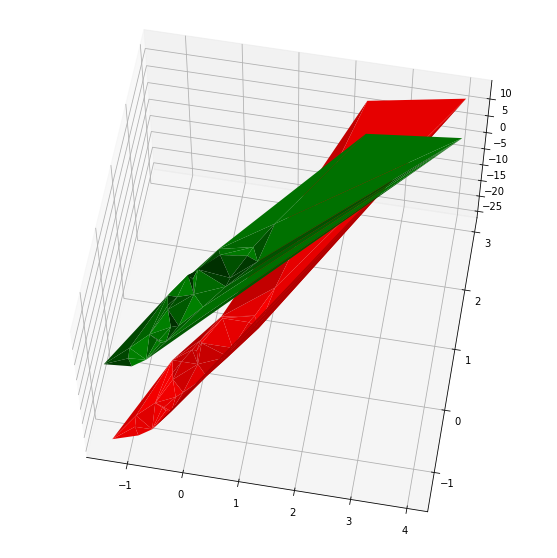

In [59]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_pred[best_mae_index],color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

##É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com o melhor MAE encontrado.

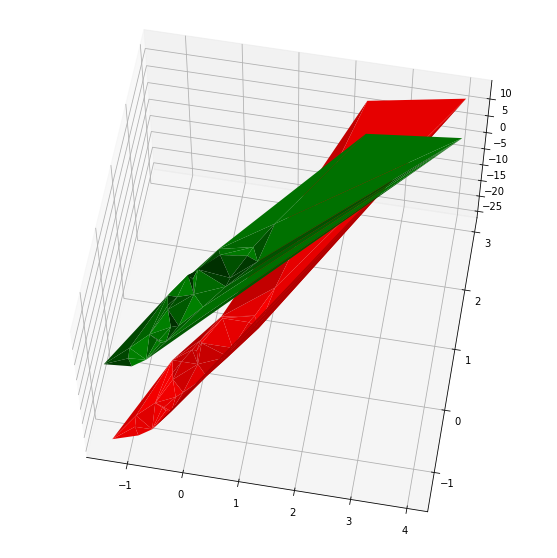

In [52]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_pred[best_mse_index],color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], Y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

##É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com o melhor MSE encontrado.